# DataMining Coursework 2 

### id: 1963072

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt



In [2]:
D=h5py.File('breast.h5', 'r')
#X:images
#Y:Cell counts
#P:Patient IDs
X,Y,P = D['images'], np.array(D['counts']),np.array(D['id'])

7404 7404 7404
<class 'h5py._hl.dataset.Dataset'>
(7404, 299, 299, 3)
(7404,)
(7404,)
4
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


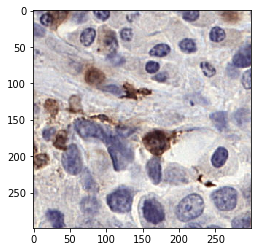

In [3]:
print(len(X), len(Y), len(P))
print(type(X))
print(X.shape)
print(Y.shape)
print(P.shape)
print(Y[0])
print(P[1:100])
plt.imshow(X[0])

# Question 1:

## i. How many training and test examples are there? [2 marks]

In [4]:
uniqueIds, indicesList, occurCount = np.unique(P, return_index=True, return_counts=True)
print(uniqueIds,"\n", indicesList,'\n', occurCount,'\n')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] 
 [   0  320  785 1743 1935 1979 2084 2167 2799 3332 3884 4645 5436 5841
 5946 6345 6949 7052] 
 [320 465 958 192  44 105  83 632 533 552 761 791 405 105 399 604 103 352] 



In [5]:
trainingSets_images = X[:5841]
testingSets_images = X[5841:]

trainingSets_ids = P[:5841]
testingSets_ids = P[5841:]

trainingSets_cellC = Y[:5841]
testingSets_cellC = Y[5841:]

# for i in range(len(P)):
#     if P[i] < 14:
#         trainingSets_ids.append(P[i])
#         trainingSets_images.append(X[i])
#         trainingSets_cellC.append(Y[i])
#     else:
#         testingSets_ids.append(P[i])
#         testingSets_images.append(X[i])
#         testingSets_cellC.append(Y[i])

    

In [6]:
trainingSets_images = np.array(trainingSets_images)
testingSets_images = np.array(testingSets_images)

trainingSets_ids = np.array(trainingSets_ids)
testingSets_ids = np.array(testingSets_ids)

trainingSets_cellC = np.array(trainingSets_cellC)
testingSets_cellC = np.array(testingSets_cellC)

In [7]:
print("The number of training examples is: ", len(trainingSets_ids))
print("The number of testing examples is: ", len(testingSets_ids))
print(trainingSets_ids[5840], testingSets_ids[0])

The number of training examples is:  5841
The number of testing examples is:  1563
13 14


### There are 5841 training and 1563 test examples, 7404 totally.

## ii. Show some image examples using plt.imshow. Describe your observations on what you see in the images and how it correlates with the cell count (target variable). [2 marks]

4
4
9
5
6
2
5
6
8
1


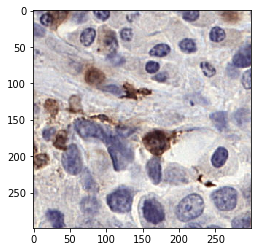

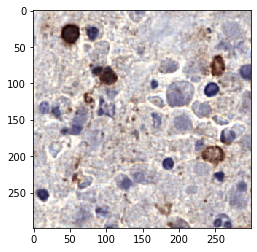

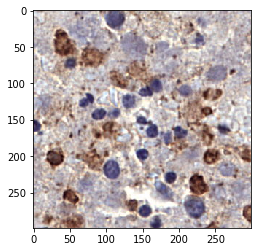

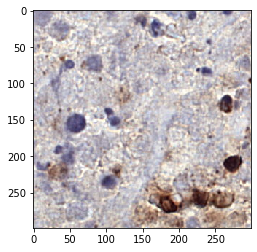

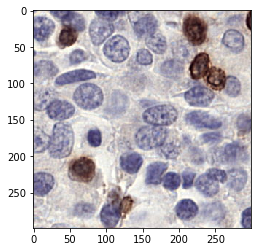

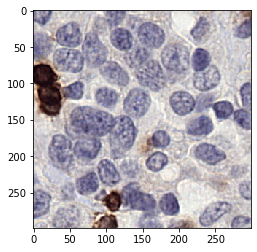

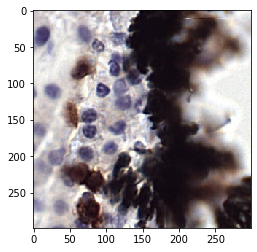

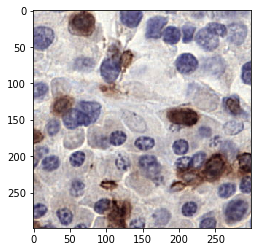

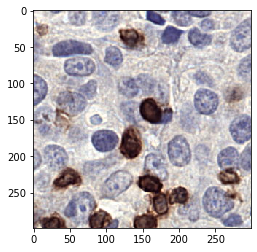

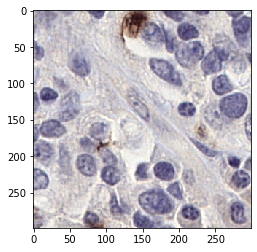

In [8]:
for i in range(10):
    plt.subplots()
    plt.imshow(X[i])
    print(Y[i])

### The image not only contains the blue nucleus, white areas and brown membrane. The brown(dark/black) areas may be the lympocytes. The cell count(target variable) is the number of the brown(dark/black) cells.

## iii. Plot the histogram of counts. How many images have counts within each of the following bins? [3 marks] 
## 0 (no lymphocytes) 1-5 6-10 11-20 21-50 51-200 >200

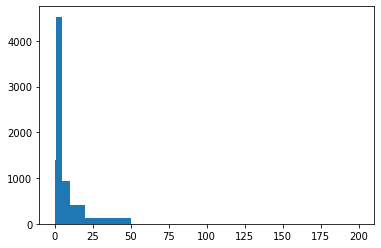

In [9]:
bins = [0, 1, 5, 10, 20, 50, 200]
plt.hist(Y, bins=bins)
plt.show()

In [10]:
(Y==0).sum()

1397

In [11]:
((Y<=10)&(Y>=1)).sum()

5547

In [12]:
((Y<=20)&(Y>=11)).sum()

356

In [13]:
((Y<=50)&(Y>=21)).sum()

103

In [14]:
((Y<=200)&(Y>=51)).sum()

1

In [15]:
(Y>200).sum()

0

### So, there are 1397 images have counts with 0, 5547 counts from 1 to 5, 356 from 11 to 20, 103 from 21 to 50, 1 from 51 to 200 and 0 more than 200.

In [16]:
1397+5547+356+103+1

7404

## iv: Pre-processing: Convert and view a few images from RGB space to HED space and show the D channel which should identify the brown elements in the image. For this purpose, you can use the color separation notebook available here: https://scikit- image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html [5 marks]

In [17]:
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])

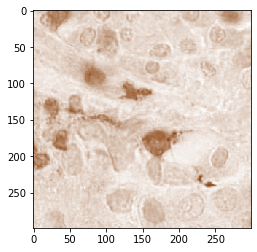

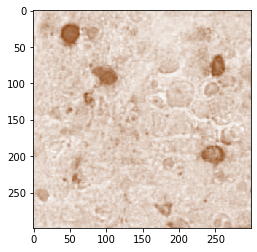

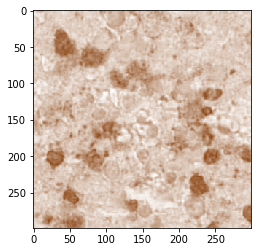

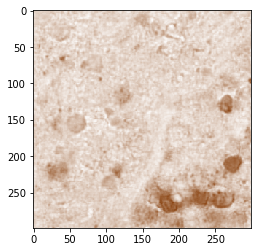

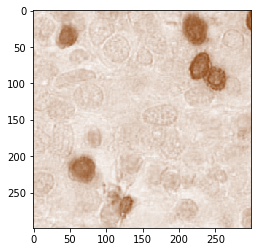

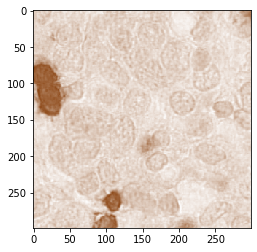

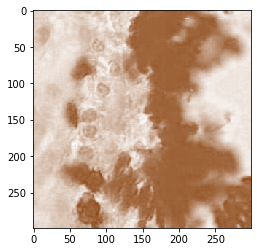

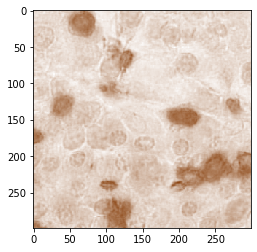

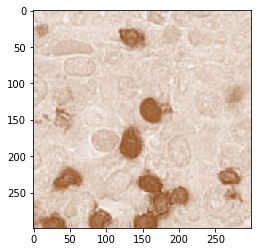

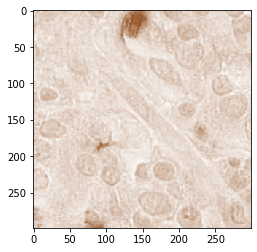

In [18]:
for i in range(10):
    plt.subplots()
    ihc_hed = rgb2hed(X[i])
    plt.imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
    
    

## v. Do a scatter plot of the average of the brown channel for each image vs. its cell count. Do you think this feature would be useful in your regression model? Explain your reasoning. [3 marks]

In [45]:
# due to the limited memory of my laptop, this step divided to several small steps to finish
# get the first 3000 hed images first
# X3000_hed_brown = rgb2hed(trainingSets_images[:3000])[:,:,:,2]

In [21]:
# print(X3000_hed_brown.shape)
# print(trainingSets_images.shape)

(3000, 299, 299)
(5841, 299, 299, 3)


In [22]:
# get the first 5842(training set) hed images
# X5000_hed_brown = rgb2hed(trainingSets_images[3000:5000])[:,:,:,2]

In [23]:
# X5000_hed_brown = np.concatenate((X3000_hed_brown, X5000_hed_brown), axis=0)

In [24]:
# print(X5000_hed_brown.shape)

(5000, 299, 299)


In [25]:
# training_hed_brown = rgb2hed(trainingSets_images[5000:])[:,:,:,2]

In [26]:
# the brown channel of training data
# training_hed_brown = np.concatenate((X5000_hed_brown, training_hed_brown), axis=0)

In [19]:
# for biger memory&storeage computer
training_hed_brown = rgb2hed(trainingSets_images)[:,:,:,2]

(5841, 299, 299)


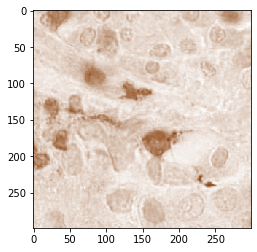

In [20]:
print(training_hed_brown.shape)
plt.imshow(training_hed_brown[0], cmap=cmap_dab)

In [21]:
# store the data to a .h5 file
hf = h5py.File('training_hed_brown.h5', 'w')
hf.create_dataset('train', data=training_hed_brown)
hf.close()

In [30]:
# testing500_hed_brown = rgb2hed(testingSets_images[:500])[:,:,:,2]

In [31]:
# testing1000_hed_brown = rgb2hed(testingSets_images[500:1000])[:,:,:,2]

In [32]:
# testing1000_hed_brown = np.concatenate((testing500_hed_brown, testing1000_hed_brown), axis=0)

In [33]:
# print(testing1000_hed_brown.shape)

(1000, 299, 299)


In [34]:
# testing_hed_brown = rgb2hed(testingSets_images[1000:])[:,:,:,2]

In [35]:
# testing_hed_brown = np.concatenate((testing1000_hed_brown, testing_hed_brown), axis=0)

In [22]:
testing_hed_brown = rgb2hed(testingSets_images)[:,:,:,2]

(1563, 299, 299)


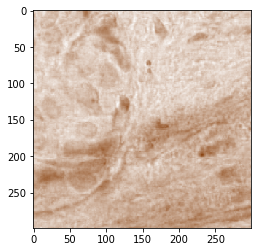

In [23]:
print(testing_hed_brown.shape)
plt.imshow(testing_hed_brown[0], cmap=cmap_dab)

In [24]:
hf = h5py.File('testing_hed_brown.h5', 'w')
hf.create_dataset('test', data=testing_hed_brown)
hf.close()

In [37]:
# X_hed_brown = np.concatenate((training_hed_brown, testing_hed_brown), axis=0)

In [25]:
X_hed_brown = rgb2hed(X)[:,:,:,2]

(7404, 299, 299)


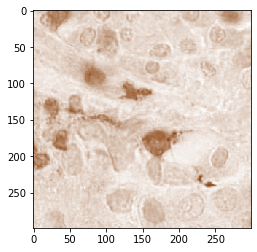

In [26]:
print(X_hed_brown.shape)
plt.imshow(X_hed_brown[0], cmap=cmap_dab)

In [27]:
hf = h5py.File('X_hed_brown.h5', 'w')
hf.create_dataset('X', data=X_hed_brown)
hf.close()

In [19]:
# retrive the train, test and all images of the brown channel
hf_train = h5py.File('training_hed_brown.h5', 'r')
training_hed_brown = hf_train['train']


hf_test = h5py.File('testing_hed_brown.h5', 'r')
testing_hed_brown = hf_test['test']


hf_X = h5py.File('X_hed_brown.h5', 'r')
X_hed_brown = hf_X['X']


(7404, 299, 299)


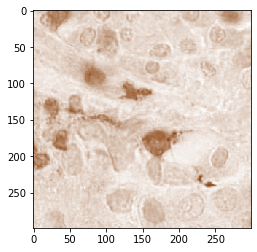

In [20]:
print(X_hed_brown.shape)
plt.imshow(X_hed_brown[0], cmap=cmap_dab)

In [21]:
X_brown_means = np.zeros(X.shape[0])
for i in range(X_hed_brown.shape[0]):
    X_brown_means[i] = np.mean(X_hed_brown[i])

Text(0.5, 1.0, 'avg of brown channel vs. cell counts(of 7404 images)')

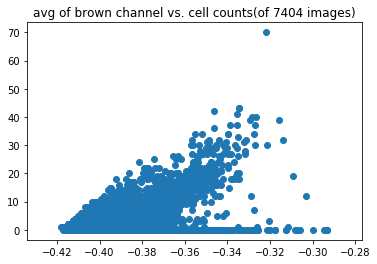

In [22]:
plt.scatter(X_brown_means, Y)
plt.title("avg of brown channel vs. cell counts(of 7404 images)")

### For brown clannel, the bigger of the average value of the brown channel the more cells which like a positive relation between the avg of brown channel and cell counts. 
### So, it is useful for the regression model, the relationship between the cell counts and average of brown channel is positive, however, the points between 0 to 10 will influence the overall performance of the regression model.

## vi. What is the number of images for each patient? Do you think this can have an impact on your regression model? [2 marks]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] 
 [   0  320  785 1743 1935 1979 2084 2167 2799 3332 3884 4645 5436 5841
 5946 6345 6949 7052] 
 [320 465 958 192  44 105  83 632 533 552 761 791 405 105 399 604 103 352] 



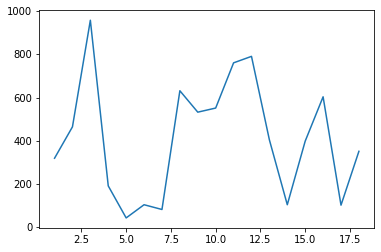

In [23]:
uniqueIds, indicesList, occurCount = np.unique(P, return_index=True, return_counts=True)
print(uniqueIds,"\n", indicesList,'\n', occurCount,'\n')
plt.plot(uniqueIds,occurCount)

### Patients:
### id=1:   320 images
### id=2:   465 images
### id=3:   958 images
### id=4:   192 images
### id=5:   44   images
### id=6:   105 images
### id=7:   83   images
### id=8:   632 images
### id=9:   533 images
### id=10: 552 images
### id=11: 761 images
### id=12: 791 images
### id=13: 405 images
### id=14: 105 images
### id=15: 399 images
### id=16: 604 images
### id=17: 103 images
### id=18: 352 images

### As it shows above, the number of images for each patient is very different which from 44 to 958 which means that could make some errors of distribution of cell counts due to the personal differences. However, objective of the regression model is to predict the number of cells for a given image and the images have been preprocessed(color stained) highlighting the key/common features of images of all patients, so the overall impact of the model is low.

## vii. What performance metrics can you use for this purpose? Which one will be the best performance metric for this problem? Please give reasoning. [3 marks]

### The performance metrics contain the Sum of squared errors, MSE(mean squared error), MAE(mean squared error), RMSE(Root mean square error), R^2 score. For this problem, the RMSE will be the best performance metric because we only care about the accuracy of the model and it is computationally simple, easily differentiable and present as default metric for most of the models.

# Question 2:

## i. Extract features from a given image. Specifically, calculate the:
## a. average of the “brown”, red, green and blue channels 
## b. variance of the “brown”, red, green and blue channels
## c. entropy of the “brown”, red, green and blue channels
## d. Histogram of each channel
## e. PCA Coefficients (you may want to use randomized PCA or incremental PCA, see:
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
## f. Any other features that you think can be useful for this work. Describe your
## reasoning for using these features.
## Plot the scatter plot and calculate the correlation coefficient of each feature you obtain vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning. [20 marks]

In [41]:
# a. average of the “brown”, red, green and blue channels for image[0]
avgBrown_0 = np.mean(X_hed_brown[0])
avgRed_0 = np.mean(X[0,:,:,0])
avgGreen_0 = np.mean(X[0,:,:,1])
avgBlue_0 = np.mean(X[0,:,:,2])
print(avgBrown_0,avgRed_0,avgGreen_0,avgBlue_0)

-0.3799775017875077 179.0747083365958 170.9491169002584 178.14088209304145


In [44]:
# b. variance of the “brown”, red, green and blue channels for image[0]
varBrown_0 = np.var(X_hed_brown[0])
varRed_0 = np.var(X[0,:,:,0])
varGreen_0 = np.var(X[0,:,:,1])
varBlue_0 = np.var(X[0,:,:,2])
print(varBrown_0,varRed_0,varGreen_0,varBlue_0)


0.0005931334288957775 1921.4295144687405 2212.668085734827 1596.1474098727995


In [24]:
# c. entropy of the “brown”, red, green and blue channels for image[0]
from scipy.stats import entropy
entrBrown_0 = entropy(X_hed_brown[0].flatten())
entrRed_0 = entropy(X[0,:,:,0].flatten())
entrGreen_0 = entropy(X[0,:,:,1].flatten())
entrBlue_0 = entropy(X[0,:,:,2].flatten())
print(entrBrown_0, entrRed_0, entrGreen_0, entrBlue_0)

11.398742842865293 11.367848794959706 11.358190087584395 11.372237658487851


[ 3810 30963 32624 12577  3888  1837  1966  1325   352    59]
[-0.42588395 -0.40785003 -0.38981611 -0.37178218 -0.35374826 -0.33571434
 -0.31768041 -0.29964649 -0.28161257 -0.26357865 -0.24554472]
-3477.249391978781


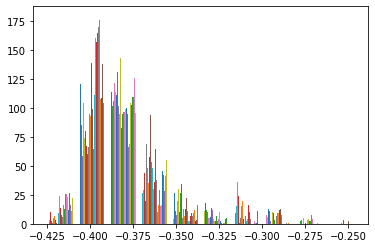

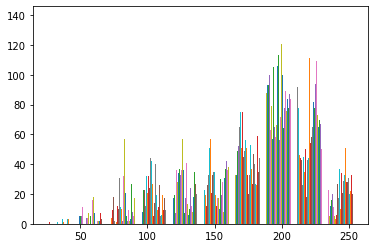

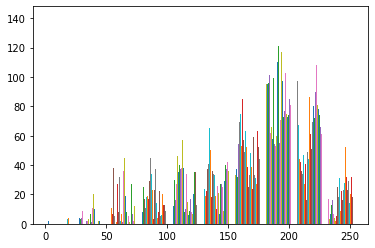

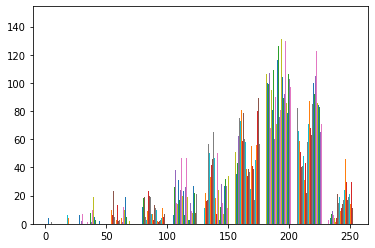

In [84]:
# d. Histogram of each channel for image[0]
hist, bins = np.histogram(X_hed_brown[0])
print(hist)
print(bins)
print(sum(hist*bins[:10])/10)
plt.hist(X_hed_brown[0])
plt.show()
plt.hist(X[0,:,:,0])
plt.show()
plt.hist(X[0,:,:,1])
plt.show()
plt.hist(X[0,:,:,2])
plt.show()

In [25]:
# e. PCA Coefficients (you may want to use randomized PCA or incremental PCA of image[0]
from sklearn.decomposition import PCA
pca = PCA(n_components=1,svd_solver='randomized')
pca.fit(X_hed_brown[0])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.22936857]
[3.3241985]


In [ ]:
# f. Any other features that you think can be useful for this work.
#    Describe your reasoning for using these features.


As the brown channel hightlight the cells and the number of cells chould affect the light of the cells. So the feature of average of the top 100 pixel values chould be helpful for the regression model

-0.2779865474537572
-0.4014087744587998
-0.2610934915573355


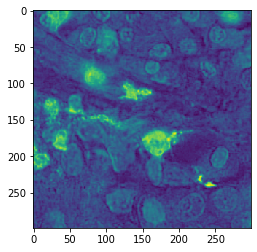

In [117]:
#for image[0]
plt.imshow(X_hed_brown[0])
print(X_hed_brown[0,170,170]) #light(cell)
print(X_hed_brown[0,210,200]) #dark

X_hed_brown_flatten0 = X_hed_brown[0].flatten()
# average of the top 100 values
print(np.mean(X_hed_brown_flatten0[np.argsort(X_hed_brown_flatten0)[-100:]]))

The correlation coefficient of
 the average of brown channel vs. cell count is:
 0.5925905331304642


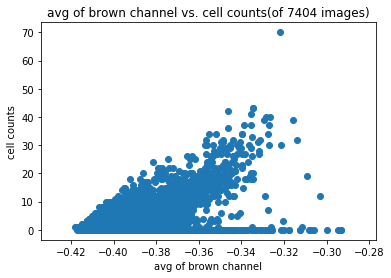

In [26]:
# scatter plot between AVERAGE of the brown channel vs. cell counts
X_brown_means = np.zeros(X.shape[0])
for i in range(X_hed_brown.shape[0]):
    X_brown_means[i] = np.mean(X_hed_brown[i])
plt.scatter(X_brown_means, Y)
plt.xlabel("avg of brown channel")
plt.ylabel("cell counts")
plt.title("avg of brown channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_brown_means, Y)
print("The correlation coefficient of\n the average of brown channel vs. cell count is:\n",
      corr)

In [27]:
X_red = X[:,:,:,0]
X_green = X[:,:,:,1]
X_blue = X[:,:,:,2]

The correlation coefficient of
 the average of red channel vs. cell count is:
 -0.416975977899675


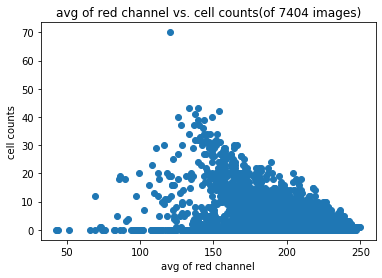

In [28]:
# scatter plot between AVERAGE of the red channel vs. cell counts
X_red_means = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_red_means[i] = np.mean(X_red[i])
plt.scatter(X_red_means, Y)
plt.xlabel("avg of red channel")
plt.ylabel("cell counts")
plt.title("avg of red channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_red_means, Y)
print("The correlation coefficient of\n the average of red channel vs. cell count is:\n",
      corr)


The correlation coefficient of
 the average of green channel vs. cell count is:
 -0.47858959176830945


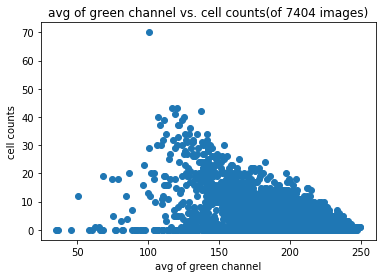

In [29]:
# scatter plot between AVERAGE of the green channel vs. cell counts
X_green_means = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_green_means[i] = np.mean(X_green[i])
plt.scatter(X_green_means, Y)
plt.xlabel("avg of green channel")
plt.ylabel("cell counts")
plt.title("avg of green channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_green_means, Y)
print("The correlation coefficient of\n the average of green channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the average of blue channel vs. cell count is:
 -0.5387397493715258


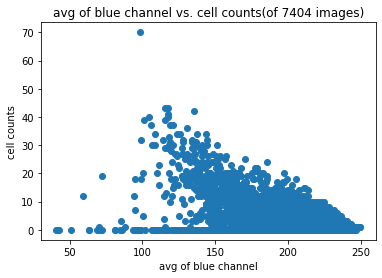

In [30]:
# scatter plot between AVERAGE of the blue channel vs. cell counts
X_blue_means = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_blue_means[i] = np.mean(X_blue[i])
plt.scatter(X_blue_means, Y)
plt.xlabel("avg of blue channel")
plt.ylabel("cell counts")
plt.title("avg of blue channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_blue_means, Y)
print("The correlation coefficient of\n the average of blue channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the variance of brown channel vs. cell count is:
 0.43721117127566966


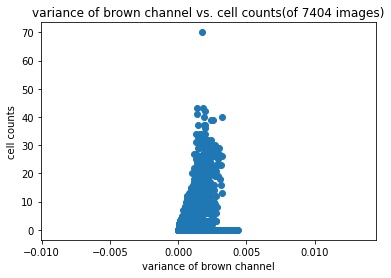

In [31]:
# scatter plot between VARIANCE of the brown channel vs. cell counts
X_brown_var = np.zeros(X.shape[0])
for i in range(X_hed_brown.shape[0]):
    X_brown_var[i] = np.var(X_hed_brown[i])
plt.scatter(X_brown_var, Y)
plt.xlabel("variance of brown channel")
plt.ylabel("cell counts")
plt.title("variance of brown channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_brown_var, Y)
print("The correlation coefficient of\n the variance of brown channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the variance of red channel vs. cell count is:
 0.15261987421658352


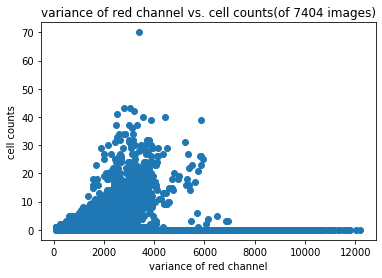

In [32]:
# scatter plot between VARIANCE of the red channel vs. cell counts
X_red_var = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_red_var[i] = np.var(X_red[i])
plt.scatter(X_red_var, Y)
plt.xlabel("variance of red channel")
plt.ylabel("cell counts")
plt.title("variance of red channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_red_var, Y)
print("The correlation coefficient of\n the variance of red channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the variance of green channel vs. cell count is:
 0.2425585361249029


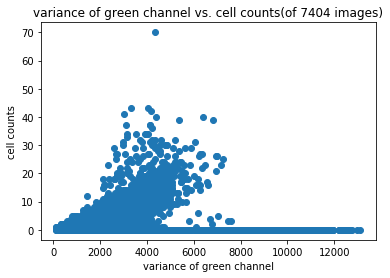

In [33]:
# scatter plot between VARIANCE of the green channel vs. cell counts
X_green_var = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_green_var[i] = np.var(X_green[i])
plt.scatter(X_green_var, Y)
plt.xlabel("variance of green channel")
plt.ylabel("cell counts")
plt.title("variance of green channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_green_var, Y)
print("The correlation coefficient of\n the variance of green channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the variance of blue channel vs. cell count is:
 0.309844391850118


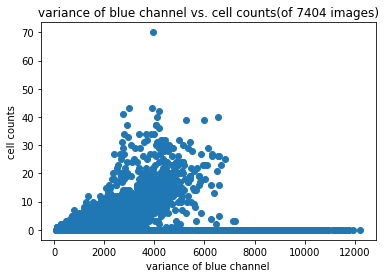

In [34]:
# scatter plot between VARIANCE of the blue channel vs. cell counts
X_blue_var = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_blue_var[i] = np.var(X_blue[i])
plt.scatter(X_blue_var, Y)
plt.xlabel("variance of blue channel")
plt.ylabel("cell counts")
plt.title("variance of blue channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_blue_var, Y)
print("The correlation coefficient of\n the variance of blue channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the entropy of brown channel vs. cell count is:
 -0.45063904159392076


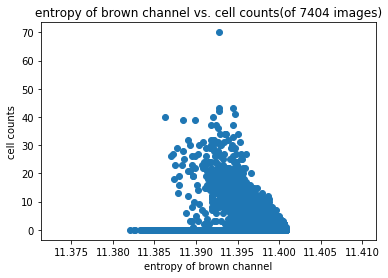

In [35]:
# scatter plot between ENTROPY of the brown channel vs. cell counts
X_brown_entro = np.zeros(X.shape[0])
for i in range(X_hed_brown.shape[0]):
    X_brown_entro[i] = entropy(X_hed_brown[i].flatten())
plt.scatter(X_brown_entro, Y)
plt.xlabel("entropy of brown channel")
plt.ylabel("cell counts")
plt.title("entropy of brown channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_brown_entro, Y)
print("The correlation coefficient of\n the entropy of brown channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the entropy of red channel vs. cell count is:
 -0.11484737081801792


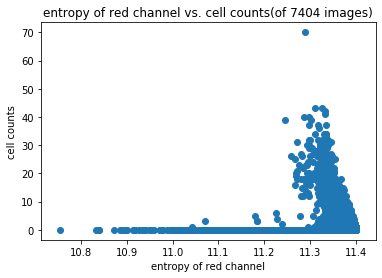

In [36]:
# scatter plot between ENTROPY of the red channel vs. cell counts
X_red_entro = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_red_entro[i] = entropy(X_red[i].flatten())
plt.scatter(X_red_entro, Y)
plt.xlabel("entropy of red channel")
plt.ylabel("cell counts")
plt.title("entropy of red channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_red_entro, Y)
print("The correlation coefficient of\n the entropy of red channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the entropy of green channel vs. cell count is:
 -0.22128643404227397


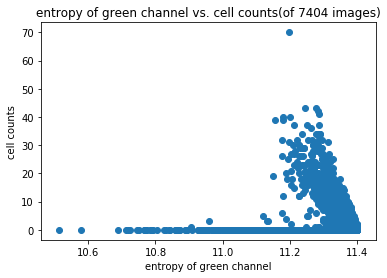

In [37]:
# scatter plot between ENTROPY of the green channel vs. cell counts
X_green_entro = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_green_entro[i] = entropy(X_green[i].flatten())
plt.scatter(X_green_entro, Y)
plt.xlabel("entropy of green channel")
plt.ylabel("cell counts")
plt.title("entropy of green channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_green_entro, Y)
print("The correlation coefficient of\n the entropy of green channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the entropy of blue channel vs. cell count is:
 -0.29378556832323666


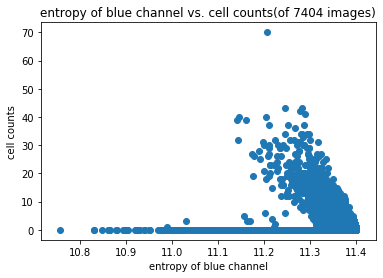

In [38]:
# scatter plot between ENTROPY of the blue channel vs. cell counts
X_blue_entro = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    X_blue_entro[i] = entropy(X_blue[i].flatten())
plt.scatter(X_blue_entro, Y)
plt.xlabel("entropy of blue channel")
plt.ylabel("cell counts")
plt.title("entropy of blue channel vs. cell counts(of 7404 images)")
corr,_ = pearsonr(X_blue_entro, Y)
print("The correlation coefficient of\n the entropy of blue channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the histogram of brown channel vs. cell count is:
 0.5776209610653735


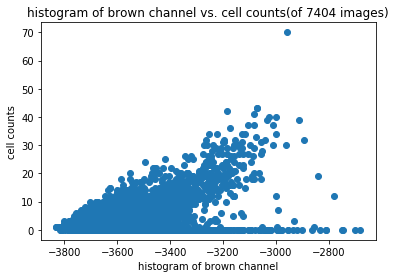

In [39]:
# scatter plot between HISTOGRAM of brown channel vs. cell counts
X_brown_histo = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    hist, bins = np.histogram(X_hed_brown[i])
    X_brown_histo[i] = sum(hist*bins[:10])/10
plt.scatter(X_brown_histo, Y)
plt.xlabel("histogram of brown channel")
plt.ylabel("cell counts")
plt.title("histogram of brown channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_brown_histo, Y)
print("The correlation coefficient of\n the histogram of brown channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the histogram of red channel vs. cell count is:
 -0.4149232305304653


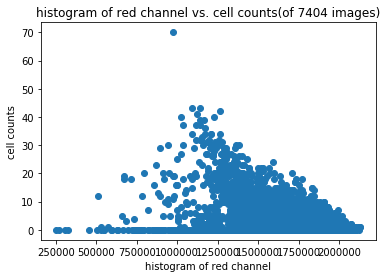

In [40]:
# scatter plot between histogram of RED channel vs. cell counts
X_red_histo = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    hist, bins = np.histogram(X_red[i])
    X_red_histo[i] = sum(hist*bins[:10])/10
plt.scatter(X_red_histo, Y)
plt.xlabel("histogram of red channel")
plt.ylabel("cell counts")
plt.title("histogram of red channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_red_histo, Y)
print("The correlation coefficient of\n the histogram of red channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the histogram of green channel vs. cell count is:
 -0.4804547261311627


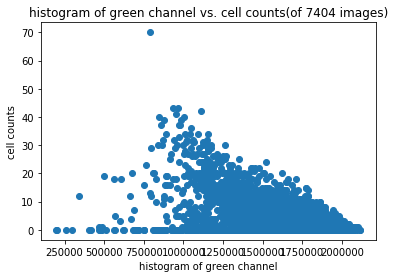

In [41]:
# scatter plot between histogram of GREEN channel vs. cell counts
X_green_histo = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    hist, bins = np.histogram(X_green[i])
    X_green_histo[i] = sum(hist*bins[:10])/10
plt.scatter(X_green_histo, Y)
plt.xlabel("histogram of green channel")
plt.ylabel("cell counts")
plt.title("histogram of green channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_green_histo, Y)
print("The correlation coefficient of\n the histogram of green channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the histogram of blue channel vs. cell count is:
 -0.5400290105946473


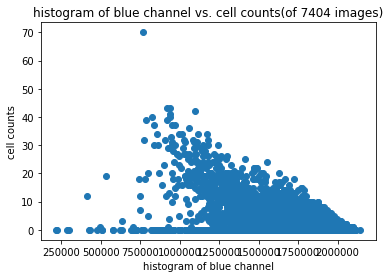

In [42]:
# scatter plot between histogram of BLUE channel vs. cell counts
X_blue_histo = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    hist, bins = np.histogram(X_blue[i])
    X_blue_histo[i] = sum(hist*bins[:10])/10
plt.scatter(X_blue_histo, Y)
plt.xlabel("histogram of blue channel")
plt.ylabel("cell counts")
plt.title("histogram of blue channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_blue_histo, Y)
print("The correlation coefficient of\n the histogram of blue channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the PCA of brown channel vs. cell count is:
 0.37373861855883905


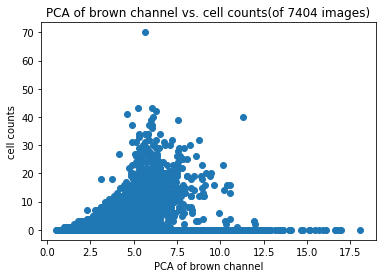

In [43]:
# scatter plot between PCA coefficients of BROWN channel vs. cell counts
pca = PCA(n_components=1,svd_solver='randomized')
X_brown_PCA = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    pca.fit(X_hed_brown[i])
    X_brown_PCA[i] = pca.singular_values_
plt.scatter(X_brown_PCA, Y)
plt.xlabel("PCA of brown channel")
plt.ylabel("cell counts")
plt.title("PCA of brown channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_brown_PCA, Y)
print("The correlation coefficient of\n the PCA of brown channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the PCA of red channel vs. cell count is:
 0.07164540720362632


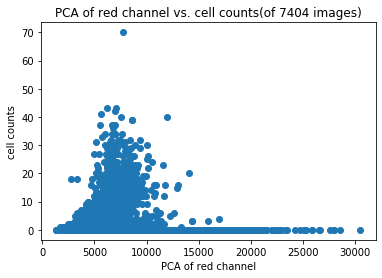

In [44]:
# scatter plot between PCA coefficients of RED channel vs. cell counts
pca = PCA(n_components=1,svd_solver='randomized')
X_red_PCA = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    pca.fit(X_red[i])
    X_red_PCA[i] = pca.singular_values_
plt.scatter(X_red_PCA, Y)
plt.xlabel("PCA of red channel")
plt.ylabel("cell counts")
plt.title("PCA of red channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_red_PCA, Y)
print("The correlation coefficient of\n the PCA of red channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the PCA of green channel vs. cell count is:
 0.16122804972651655


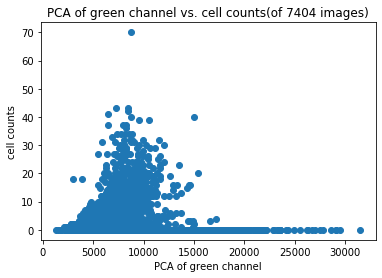

In [45]:
# scatter plot between PCA coefficients of Green channel vs. cell counts
pca = PCA(n_components=1,svd_solver='randomized')
X_green_PCA = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    pca.fit(X_green[i])
    X_green_PCA[i] = pca.singular_values_
plt.scatter(X_green_PCA, Y)
plt.xlabel("PCA of green channel")
plt.ylabel("cell counts")
plt.title("PCA of green channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_green_PCA, Y)
print("The correlation coefficient of\n the PCA of green channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the PCA of blue channel vs. cell count is:
 0.25711329346208567


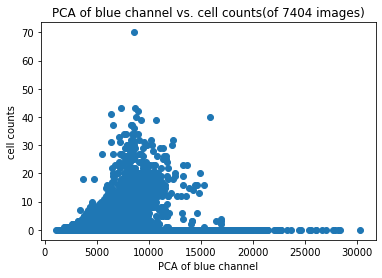

In [46]:
# scatter plot between PCA coefficients of BLUE channel vs. cell counts
pca = PCA(n_components=1,svd_solver='randomized')
X_blue_PCA = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    pca.fit(X_blue[i])
    X_blue_PCA[i] = pca.singular_values_
plt.scatter(X_blue_PCA, Y)
plt.xlabel("PCA of blue channel")
plt.ylabel("cell counts")
plt.title("PCA of blue channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_blue_PCA, Y)
print("The correlation coefficient of\n the PCA of blue channel vs. cell count is:\n",
      corr)

The correlation coefficient of
 the Top 100 of brown channel vs. cell count is:
 0.40397824631123636


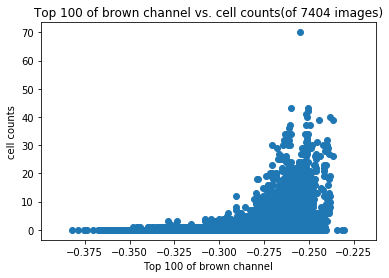

In [47]:
# scatter plot between top 100 pixel values vs. cell counts
X_brown_top100 = np.zeros(X.shape[0])
for i in range(X_hed_brown.shape[0]):
    X_hed_brown_flatten0 = X_hed_brown[i].flatten()
    X_brown_top100[i] = np.mean(X_hed_brown_flatten0[np.argsort(X_hed_brown_flatten0)[-100:]])
plt.scatter(X_brown_top100, Y)
plt.xlabel("Top 100 of brown channel")
plt.ylabel("cell counts")
plt.title("Top 100 of brown channel vs. cell counts(of 7404 images)")

from scipy.stats import pearsonr
corr,_ = pearsonr(X_brown_top100, Y)
print("The correlation coefficient of\n the Top 100 of brown channel vs. cell count is:\n",
      corr)


Acroding to the 21 Scatter plots and correlation coefficients of them, the feature with the best performance is the 'Average of the 'brown' channel' which correlation coefficient vs. cell count is 0.5925905331304642.
Also, 'Histogram of brown channel'  which correlation coefficient vs. cell count is: 0.5776209610653735
'Histogram of blue channel' which correlation coefficient vs. cell count is: -0.5400290105946473
'Average of the blue channel' which correlation coefficient vs. cell count is: -0.5387397493715258

Above all, the 'Average of the 'brown' channel', 'Histogram of brown channel','Histogram of blue channel' and 'Average of the blue channel' are important features and all of them has correlation coefficients vs. cell count above 0.5.

## ii. Try the following regression models with the features used in part-I. You can do 3-fold cross-validation analysis (https://scikit-learn.org/stable/modules/cross_validation.html) to select feature combinations and optimal hyper-parameters for your models. Report your results on the test set by plotting the scatter plot between true and predicted counts for each type of regression model. Also, report your results in terms of RMSE, Correlation Coefficient and R2 score (https://scikit- learn.org/stable/modules/classes.html#module-sklearn.metrics). [30 Marks]
## a. Ordinary Least Squares (OLS) regression

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import keras
import sklearn.model_selection
from keras.optimizers import SGD

In [209]:
# a. Ordinary Least Squares (OLS) regression
# combine the 'arerage of the brown channel' and the 'Histogram of brown channel'
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
X_brown_histoTrain = np.array(X_brown_histo[:5841])
trainData = np.vstack((X_brown_meansTrain, X_brown_histoTrain)).T
trainLabel = np.array(Y[:5841])

reg = linear_model.LinearRegression(fit_intercept = False)
RMSE = []
for train_index, test_index in skf.split(trainData, trainLabel):
    print(test_index[0])
    reg.fit(trainData[train_index], trainLabel[train_index])
    predicted = reg.predict(trainData[test_index])
    #perform RMSE performane metric(smaller is better)
    rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
    RMSE.append(rmse)
print("The RMSE of combination of'arerage of the brown channel' and 'Histogram of brown channel' is:",np.mean(RMSE))

0
980
2713
The RMSE of combination of'arerage of the brown channel' and 'Histogram of brown channel' is: 4.243705353368923


/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[-0.3799775]
0
980
2713
The RMSE of just using 'arerage of the brown channel' is: 3.8928497001333304
RMSE is: 3.7173657321218494 Correlation Coefficient is: 0.7105769437005502 R2 is: 0.47344117412502584


/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


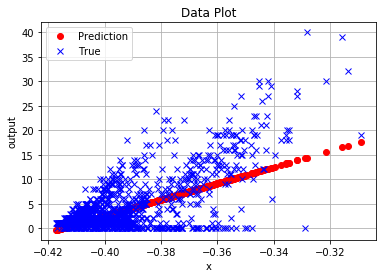

In [211]:
# just use the 'arerage of the brown channel'
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
trainData = X_brown_meansTrain.reshape(-1, 1)
print(trainData[0])
trainLabel = np.array(Y[:5841])

testData = np.array(X_brown_means[5841:]).reshape(-1,1)
testLabel = np.array(Y[5841:])

reg = linear_model.LinearRegression(fit_intercept = True)
RMSE = []
for train_index, test_index in skf.split(trainData, trainLabel):
    print(test_index[0])
    reg.fit(trainData[train_index], trainLabel[train_index])
    predicted = reg.predict(trainData[test_index])
    #perform RMSE performane metric(smaller is better)
    rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
    RMSE.append(rmse)

print("The RMSE of just using 'arerage of the brown channel' is:",np.mean(RMSE))

predicted_testLabel = reg.predict(testData)
plt.figure();plt.plot(testData,predicted_testLabel,'ro');plt.plot(testData,testLabel,'bx');plt.grid();
plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);
plt.title('Data Plot')

rmse_test = sqrt(mean_squared_error(testLabel, predicted_testLabel))
corr,_ = pearsonr(testLabel, predicted_testLabel)
R2 = r2_score(testLabel, predicted_testLabel)
print("RMSE is:",rmse_test,"Correlation Coefficient is:", corr,"R2 is:", R2)

The RMSE value is smaller when just using the 'average of the brown channel', so, the 

## b. Multilayer Perceptron (in Keras or PyTorch).

[-0.3799775]
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_90 (Batc (None, 1)                 4         
_________________________________________________________________
dense_122 (Dense)            (None, 32)                64        
_________________________________________________________________
dropout_100 (Dropout)        (None, 32)                0         
_________________________________________________________________
batch_normalization_91 (Batc (None, 32)                128       
_________________________________________________________________
dense_123 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_101 (Dropout)        (None, 32)                0         
_________________________________________________________________
batch_normalization_92 (Batc (None, 32) 

Text(0.5, 1.0, 'Data Plot')

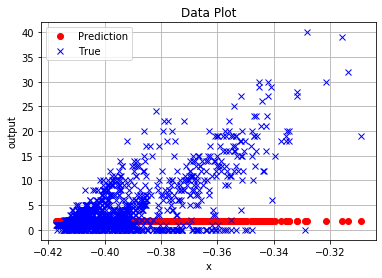

In [113]:
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
trainData = X_brown_meansTrain.reshape(-1, 1)
print(trainData[0])
trainLabel = np.array(Y[:5841])

testData = np.array(X_brown_means[5841:]).reshape(-1,1)
testLabel = np.array(Y[5841:])

x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(trainData, trainLabel, test_size=0.3, random_state=0)

# build model
model = keras.models.Sequential()
model.add(keras.layers.normalization.BatchNormalization(input_shape=tuple([x_train.shape[1]])))
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.core.Dense(1,   activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
print(model.summary())

callback_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

# training
model.fit(x_train, y_train, batch_size=1024, epochs=200, 
          validation_data=(x_valid, y_valid), verbose=1, callbacks=[callback_early_stopping])

predicted_testLabel = model.predict(testData)

rmse_test = sqrt(mean_squared_error(testLabel, predicted_testLabel))
corr,_ = pearsonr(testLabel, predicted_testLabel.flatten())
R2 = r2_score(testLabel, predicted_testLabel)
print("RMSE is:",rmse_test,"Correlation Coefficient is:", corr,"R2 is:", R2)

plt.figure();plt.plot(testData,predicted_testLabel,'ro');plt.plot(testData,testLabel,'bx');plt.grid();
plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);
plt.title('Data Plot')


As it shows above the Multilayer perceptron perform worse than the OLS regression with these parameters.

## c. Ridge Regression (Required For MSc. Students only)

In [212]:
# c. Ridge regression
# combine the 'arerage of the brown channel' and the 'Histogram of brown channel'
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
X_brown_histoTrain = np.array(X_brown_histo[:5841])
trainData = np.vstack((X_brown_meansTrain, X_brown_histoTrain)).T
trainLabel = np.array(Y[:5841])

reg = linear_model.Ridge(alpha=5, fit_intercept = False)
RMSE = []
for train_index, test_index in skf.split(trainData, trainLabel):
    print(test_index[0])
    reg.fit(trainData[train_index], trainLabel[train_index])
    predicted = reg.predict(trainData[test_index])
    #perform RMSE performane metric(smaller is better)
    rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
    RMSE.append(rmse)
print("The RMSE of combination of'arerage of the brown channel' and 'Histogram of brown channel' is:",np.mean(RMSE))

0
980
2713
The RMSE of combination of'arerage of the brown channel' and 'Histogram of brown channel' is: 4.593535389574467


/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [217]:
# just use the 'arerage of the brown channel'
# tunning the hyperparameter: alpha
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
trainData = X_brown_meansTrain.reshape(-1, 1)
print(trainData[0])
trainLabel = np.array(Y[:5841])

testData = np.array(X_brown_means[5841:]).reshape(-1,1)
testLabel = np.array(Y[5841:])

for alp in range(10):
    reg = linear_model.Ridge(alpha=alp,fit_intercept = True)
    RMSE = []
    for train_index, test_index in skf.split(trainData, trainLabel):
        reg.fit(trainData[train_index], trainLabel[train_index])
        predicted = reg.predict(trainData[test_index])
        #perform RMSE performane metric(smaller is better)
        rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
        RMSE.append(rmse)
    print(alp, "The RMSE of just using 'arerage of the brown channel' is:",np.mean(RMSE))

[-0.3799775]
0 The RMSE of just using 'arerage of the brown channel' is: 3.8928497001333304
1 The RMSE of just using 'arerage of the brown channel' is: 4.032375541427043
2 The RMSE of just using 'arerage of the brown channel' is: 4.164678205489197
3 The RMSE of just using 'arerage of the brown channel' is: 4.24503638026605
4 The RMSE of just using 'arerage of the brown channel' is: 4.297469983927426
5 The RMSE of just using 'arerage of the brown channel' is: 4.33410364550475
6 The RMSE of just using 'arerage of the brown channel' is: 4.361066868919201
7 The RMSE of just using 'arerage of the brown channel' is: 4.381714961909094
8 The RMSE of just using 'arerage of the brown channel' is: 4.3980225300065845
9 The RMSE of just using 'arerage of the brown channel' is: 4.4112226920823465


/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 m

[-0.3799775]
0
980
2713
The RMSE of just using 'arerage of the brown channel' is: 3.8928497001333304
RMSE is: 3.7173657321218503 Correlation Coefficient is: 0.7105769437005502 R2 is: 0.47344117412502573


/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


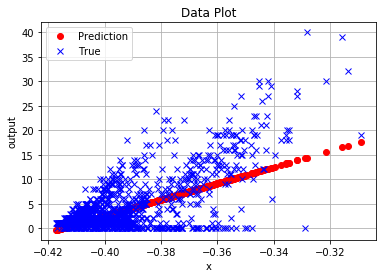

In [224]:
# just use the 'arerage of the brown channel'
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
trainData = X_brown_meansTrain.reshape(-1, 1)
print(trainData[0])
trainLabel = np.array(Y[:5841])

testData = np.array(X_brown_means[5841:]).reshape(-1,1)
testLabel = np.array(Y[5841:])

reg = linear_model.Ridge(alpha=0,fit_intercept = True)
RMSE = []
for train_index, test_index in skf.split(trainData, trainLabel):
    print(test_index[0])
    reg.fit(trainData[train_index], trainLabel[train_index])
    predicted = reg.predict(trainData[test_index])
    #perform RMSE performane metric(smaller is better)
    rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
    RMSE.append(rmse)

print("The RMSE of just using 'arerage of the brown channel' is:",np.mean(RMSE))

predicted_testLabel = reg.predict(testData)
plt.figure();plt.plot(testData,predicted_testLabel,'ro');plt.plot(testData,testLabel,'bx');plt.grid();
plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);
plt.title('Data Plot')

rmse_test = sqrt(mean_squared_error(testLabel, predicted_testLabel))
corr,_ = pearsonr(testLabel, predicted_testLabel)
R2 = r2_score(testLabel, predicted_testLabel)
print("RMSE is:",rmse_test,"Correlation Coefficient is:", corr,"R2 is:", R2)

## d. Support Vector Regression (Required For MSc. Students only)

In [ ]:
# c. Ridge regression
# combine the 'arerage of the brown channel' and the 'Histogram of brown channel'
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
X_brown_histoTrain = np.array(X_brown_histo[:5841])
trainData = np.vstack((X_brown_meansTrain, X_brown_histoTrain)).T
trainLabel = np.array(Y[:5841])

reg = SVR(kernel='linear',C=1.0)
RMSE = []
for train_index, test_index in skf.split(trainData, trainLabel):
    print(test_index[0])
    reg.fit(trainData[train_index], trainLabel[train_index])
    predicted = reg.predict(trainData[test_index])
    #perform RMSE performane metric(smaller is better)
    rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
    RMSE.append(rmse)
print("The RMSE of combination of'arerage of the brown channel' and 'Histogram of brown channel' is:",np.mean(RMSE))

In [ ]:
# just use the 'arerage of the brown channel'
skf = StratifiedKFold(n_splits = 3)
X_brown_meansTrain = np.array(X_brown_means[:5841])
trainData = X_brown_meansTrain.reshape(-1, 1)
print(trainData[0])
trainLabel = np.array(Y[:5841])

testData = np.array(X_brown_means[5841:]).reshape(-1,1)
testLabel = np.array(Y[5841:])

reg = SVR(kernel='linear',C=1.0)
RMSE = []
for train_index, test_index in skf.split(trainData, trainLabel):
    print(test_index[0])
    reg.fit(trainData[train_index], trainLabel[train_index])
    predicted = reg.predict(trainData[test_index])
    #perform RMSE performane metric(smaller is better)
    rmse = sqrt(mean_squared_error(trainLabel[test_index], predicted))
    RMSE.append(rmse)

print("The RMSE of just using 'arerage of the brown channel' is:",np.mean(RMSE))

predicted_testLabel = reg.predict(testData)
plt.figure();plt.plot(testData,predicted_testLabel,'ro');plt.plot(testData,testLabel,'bx');plt.grid();
plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);
plt.title('Data Plot')

rmse_test = sqrt(mean_squared_error(testLabel, predicted_testLabel))
corr,_ = pearsonr(testLabel, predicted_testLabel)
R2 = r2_score(testLabel, predicted_testLabel)
print("RMSE is:",rmse_test,"Correlation Coefficient is:", corr,"R2 is:", R2)

# Question No. 3 (Using Convolutional Neural Networks) [30 Marks]

In [100]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [82]:
train_images = np.array(X[:5841])
test_images = np.array(X[5841:])
print(train_images.shape, test_images.shape)

train_cellC = np.array(Y[:5841])
test_cellC = np.array(Y[5841:])
print(train_cellC.shape, test_cellC.shape)

(5841, 299, 299, 3) (1563, 299, 299, 3)
(5841,) (1563,)


In [93]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', 
                 input_shape = (299, 299, 3)))
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(512))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1, activation='relu'))

model.summary()



Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 297, 297, 32)      896       
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 299, 299, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 297, 297, 32)      9248      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 295, 295, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 147, 147, 32)      0         
_________________________________________________________________
dropout_96 (Dropout)         (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 145, 145, 64)    

In [112]:
model.compile(Adam(lr=0.001), loss='mean_squared_error', 
              metrics=['mse'])
earlystopper = EarlyStopping(patience=15, verbose=1)
callbacks_list = [earlystopper]
model.fit(train_images, train_cellC, validation_split=0.1, batch_size=16, epochs=100, 
                    callbacks=callbacks_list)

Train on 5256 samples, validate on 585 samples
Epoch 1/1
5256/5256 [==============================] - 1486s 283ms/step - loss: 7.6116 - mse: 7.6116 - val_loss: 128.2627 - val_mse: 128.2627


In [104]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [106]:
model.load_weights('model.h5')
predicted_testLabel = model.predict(test_images)



RMSE is: 5.3397406315512965 Correlation Coefficient is: 0.5606551422508235 R2 is: -0.0864672487267979


Text(0.5, 1.0, 'Data Plot')

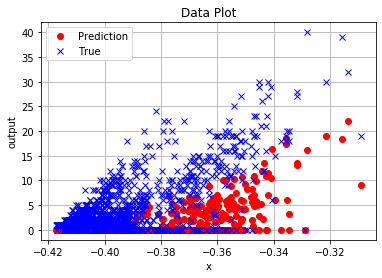

In [110]:
rmse_test = sqrt(mean_squared_error(testLabel, predicted_testLabel))
corr,_ = pearsonr(testLabel, predicted_testLabel.flatten())
R2 = r2_score(testLabel, predicted_testLabel)
print("RMSE is:",rmse_test,"Correlation Coefficient is:", corr,"R2 is:", R2)

plt.figure();plt.plot(testData,predicted_testLabel,'ro');plt.plot(testData,testLabel,'bx');plt.grid();
plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);
plt.title('Data Plot')

Because of time consuming, each epoch will take about 30-50 minutes and the current module was trained after 10 epochs, if the model keep training better model will generated.